### Importing Packages

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns

### Reading CSV Data

In [97]:
file_name = 'train.csv'
train_data = pd.read_csv(file_name, sep=',', header=0)

file_name = 'test.csv'
test_data = pd.read_csv(file_name, sep=',', header=0)

# Concatenating train_data and test_data
data = train_data.append(test_data, ignore_index=True, sort=False)

(1309, 12)


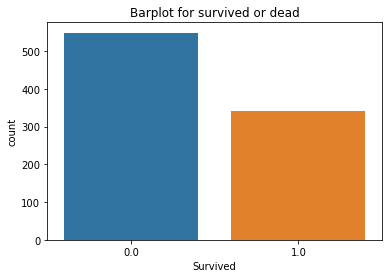

In [98]:
train_data.shape
print(data.shape)
plt.figure()
sns.countplot(x='Survived', data=data)
plt.title('Barplot for survived or dead')
plt.show()

## PART 1

### Detail look for NaN (not a number) elements in Dataset

In [99]:
for column in range(1, data.shape[1]):
    print('Number of NaN elements in {0} column: {1} out of {2}\n'
          .format(data.columns[column],
                  data.iloc[:, column].isna().sum(), data.shape[0]))
    print('----------------------------\n')

Number of NaN elements in Survived column: 418 out of 1309

----------------------------

Number of NaN elements in Pclass column: 0 out of 1309

----------------------------

Number of NaN elements in Name column: 0 out of 1309

----------------------------

Number of NaN elements in Sex column: 0 out of 1309

----------------------------

Number of NaN elements in Age column: 263 out of 1309

----------------------------

Number of NaN elements in SibSp column: 0 out of 1309

----------------------------

Number of NaN elements in Parch column: 0 out of 1309

----------------------------

Number of NaN elements in Ticket column: 0 out of 1309

----------------------------

Number of NaN elements in Fare column: 1 out of 1309

----------------------------

Number of NaN elements in Cabin column: 1014 out of 1309

----------------------------

Number of NaN elements in Embarked column: 2 out of 1309

----------------------------



### Finding Titles of Names and Adding 'Title' column to DataFrame

In [100]:
titles = []
regex = r'([A-Z]\w+)\.'
for row in range(data.shape[0]):
    match = re.search(regex, data.iloc[row, 3])
    titles.append(match.group(1))

# adding 'Title' column to Dataframe
data['Title'] = titles

In [101]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Dona
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Mr


### Categorizing 'Title' Column

In [102]:
print('Number of different \'Title\' names Before Categorizing:')
print('----------------------------------------')
print(data.Title.value_counts())

# finding indices of titles other than 'Mr', 'Mrs' and 'Miss' and change them to 'Others'
others_indices = data[data["Title"].str.contains('Mr|Mrs|Miss')==False].index
data.loc[others_indices, 'Title'] = 'Others'

# finding indices of titles other than 'Mr' and 'Others' and change them to 'Mrs'
others_indices = data[data["Title"].str.contains('Mr|Others')==False].index
data.loc[others_indices, 'Title'] = 'Mrs'
print('----------------------------------------')
print('Number of different \'Title\' names After Categorizing:')
print('----------------------------------------')
print(data.Title.value_counts())

Number of different 'Title' names Before Categorizing:
----------------------------------------
Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: Title, dtype: int64
----------------------------------------
Number of different 'Title' names After Categorizing:
----------------------------------------
Mr        757
Mrs       457
Others     95
Name: Title, dtype: int64


In [103]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Mrs
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Others
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Mr


### Filling NaN Elements in Age Column

In [104]:
# replacing NaN with mean of each title
titles = data.Title.unique()

for title in titles:
    grouped = data.groupby('Title').get_group(title)
    data.loc[grouped.index, 'Age'] = grouped.Age.fillna(grouped.Age.mean())

In [105]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,Mrs
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,32.252151,0,0,A.5. 3236,8.0500,NaN,S,Mr
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C,Others
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr
1307,1308,NaN,3,"Ware, Mr. Frederick",male,32.252151,0,0,359309,8.0500,NaN,S,Mr


### Boxplot of Fare Values and filling NaN elements

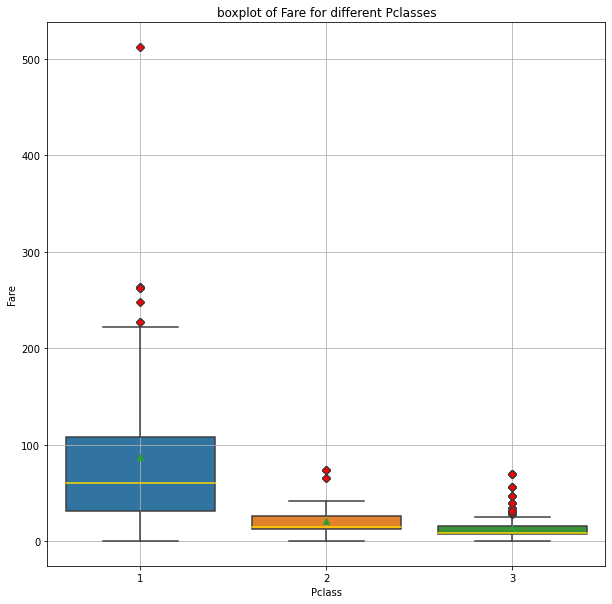

In [106]:
Pclasses = data.Pclass.unique()

for pclass in Pclasses:
    grouped = data.groupby('Pclass').get_group(pclass)
    data.loc[grouped.index, 'Fare'] = grouped.Fare.fillna(grouped.Fare.mean())
    
plt.figure(figsize=(10, 10))
red_diamond = dict(markerfacecolor='r', marker='D')
sns.boxplot(x='Pclass', y='Fare', data=data, showmeans=True ,medianprops={'color':'gold'}, flierprops=red_diamond)
plt.title("boxplot of Fare for different Pclasses")
plt.grid()
plt.show()

### Categorizing Embarked Column

In [107]:
data.loc[:, 'Embarked'] = data.fillna(0) # to get rid of nan using problems in the following for loop
Embs = data.Embarked.unique()

# initialize 'Emb1' and 'Emb2' Column with zero
data['Emb1'] = [0]*len(data)
data['Emb2'] = [0]*len(data)
i = 0

for Emb in Embs:
    # S ---> 00, C ---> 01, Q ---> 10, nan ---> 11
    grouped = data.groupby('Embarked').get_group(Emb)
    data.loc[grouped.index, 'Emb1'] = i // 2
    data.loc[grouped.index, 'Emb2'] = i % 2
    i = i + 1

### Categorizing Sex Column

In [108]:
genders = data.Sex.unique()
i = 0

for gender in genders:
    # Male ---> 0, Female ---> 1
    grouped = data.groupby('Sex').get_group(gender)
    data.loc[grouped.index, 'Sex'] = i % 2
    i = i + 1

### Droping Embarked Column

In [109]:
data = data.drop('Embarked', axis=1)

In [110]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title,Emb1,Emb2
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,NaN,Mr,0,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C85,Mrs,0,1
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,Mrs,0,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,C123,Mrs,0,0
4,5,0.0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,NaN,Mr,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",0,32.252151,0,0,A.5. 3236,8.0500,NaN,Mr,0,0
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",1,39.000000,0,0,PC 17758,108.9000,C105,Others,0,1
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",0,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,Mr,0,0
1307,1308,NaN,3,"Ware, Mr. Frederick",0,32.252151,0,0,359309,8.0500,NaN,Mr,0,0


## PART2

### Describing Data

In [111]:
print("================================== All of the Data ==================================")
data.describe()

================================== All of the Data ==================================


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Emb1,Emb2
count,1309.000000,891.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,0.383838,2.294882,30.044098,0.498854,0.385027,33.280206,0.095493,0.207792
std,378.020061,0.486592,0.837836,12.947325,1.041658,0.865560,51.741830,0.294007,0.405882
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000
50%,655.000000,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200,0.000000,0.000000
75%,982.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.275000,0.000000,0.000000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000,1.000000


In [112]:
print("================================== Survived People ==================================")
grouped = data.groupby('Survived').get_group(1)
grouped.describe()

================================== Survived People ==================================


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Emb1,Emb2
count,342.000000,342.0,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000
mean,444.368421,1.0,1.950292,28.477040,0.473684,0.464912,48.395408,0.093567,0.277778
std,252.358840,0.0,0.863321,13.802919,0.708688,0.771712,66.596998,0.291652,0.448559
min,2.000000,1.0,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,250.750000,1.0,1.000000,21.000000,0.000000,0.000000,12.475000,0.000000,0.000000
50%,439.500000,1.0,2.000000,28.583132,0.000000,0.000000,26.000000,0.000000,0.000000
75%,651.500000,1.0,3.000000,35.000000,1.000000,1.000000,57.000000,0.000000,1.000000
max,890.000000,1.0,3.000000,80.000000,4.000000,5.000000,512.329200,1.000000,1.000000


In [113]:
print("================================== Dead People ==================================")
grouped = data.groupby('Survived').get_group(0)
grouped.describe()

================================== Dead People ==================================


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Emb1,Emb2
count,549.000000,549.0,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,447.016393,0.0,2.531876,30.812972,0.553734,0.329690,22.117887,0.085610,0.136612
std,260.640469,0.0,0.735805,12.502648,1.288399,0.823166,31.388207,0.280043,0.343751
min,1.000000,0.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,211.000000,0.0,2.000000,23.000000,0.000000,0.000000,7.854200,0.000000,0.000000
50%,455.000000,0.0,3.000000,32.000000,0.000000,0.000000,10.500000,0.000000,0.000000
75%,675.000000,0.0,3.000000,35.000000,1.000000,0.000000,26.000000,0.000000,0.000000
max,891.000000,0.0,3.000000,74.000000,8.000000,6.000000,263.000000,1.000000,1.000000


### Barplot for Different Titles

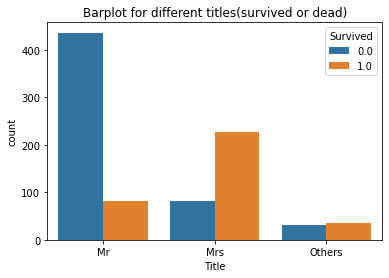

In [114]:
plt.figure()
sns.countplot(x='Title', hue='Survived', data=data)
plt.title('Barplot for different titles(survived or dead)')
plt.show()

### Boxplot of Fare Values

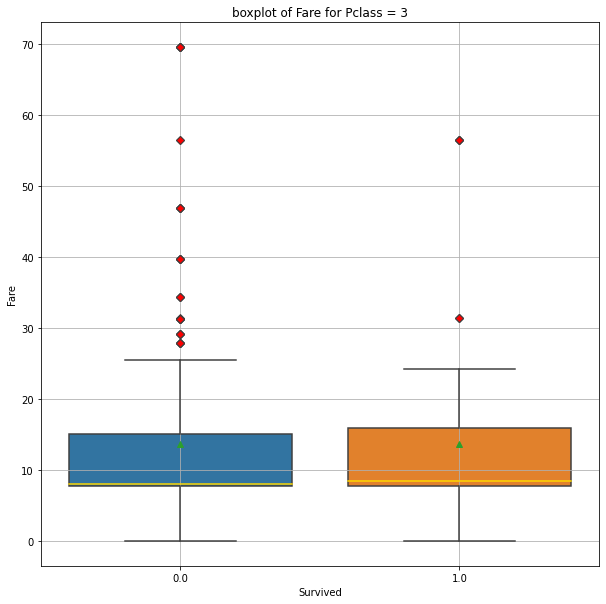

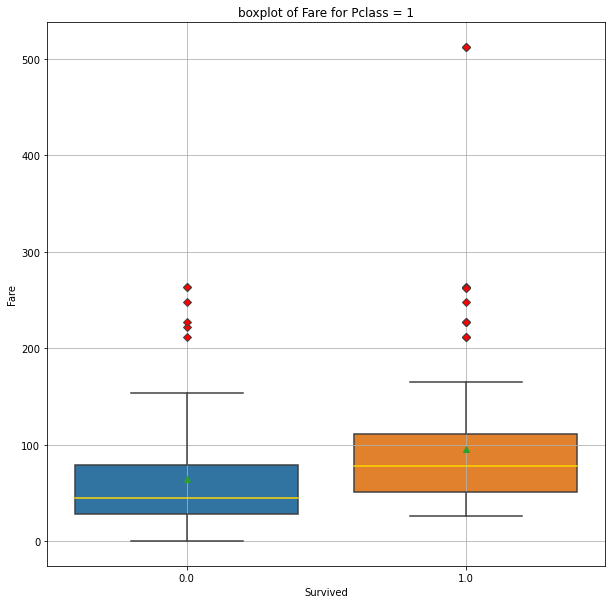

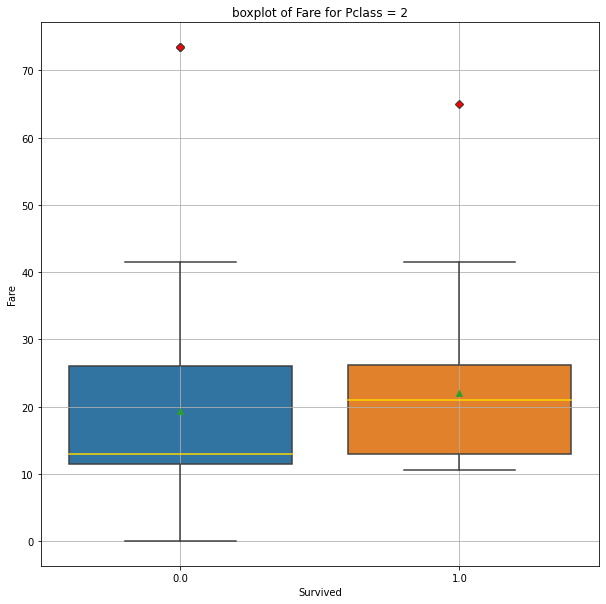

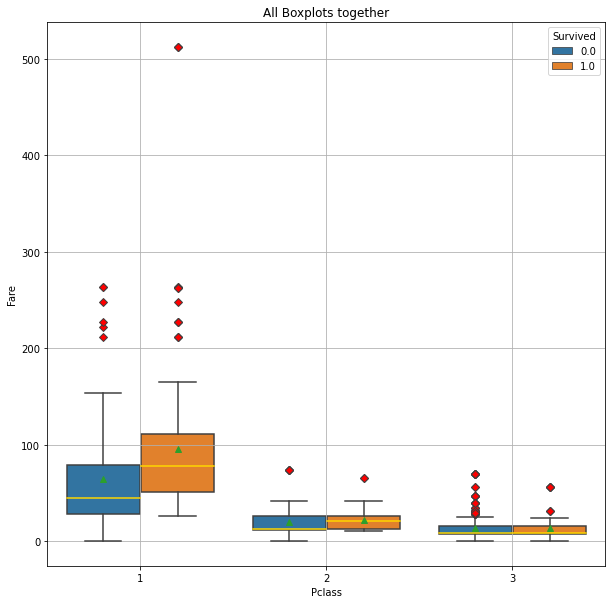

In [115]:
Pclasses = data.Pclass.unique()
red_diamond = dict(markerfacecolor='r', marker='D')

for pclass in Pclasses:
    grouped = data.groupby('Pclass').get_group(pclass)
    plt.figure(figsize=(10, 10))
    sns.boxplot(x='Survived', y='Fare', data=grouped, showmeans=True ,medianprops={'color':'gold'},
                flierprops=red_diamond)
    plt.title("boxplot of Fare for Pclass = {0}".format(pclass))
    plt.grid()
    plt.show()
    
# all boxplots together
plt.figure(figsize=(10, 10))
sns.boxplot(x='Pclass', y='Fare', hue='Survived', data=data, showmeans=True ,medianprops={'color':'gold'},
            flierprops=red_diamond)
plt.title("All Boxplots together")
plt.grid()
plt.show()

### Histogram of Age Values

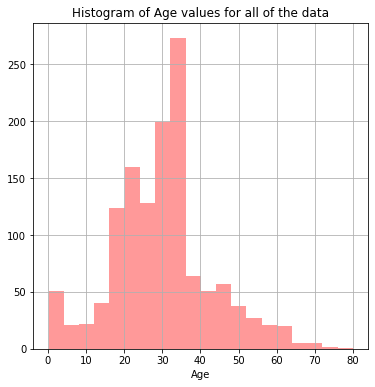

----------------------------------------------------------------------


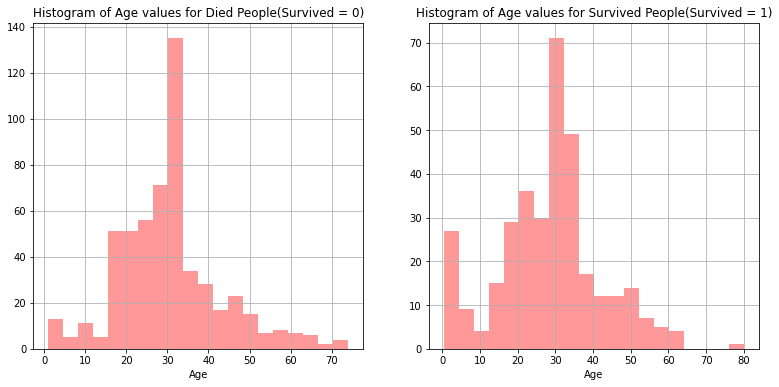

----------------------------------------------------------------------


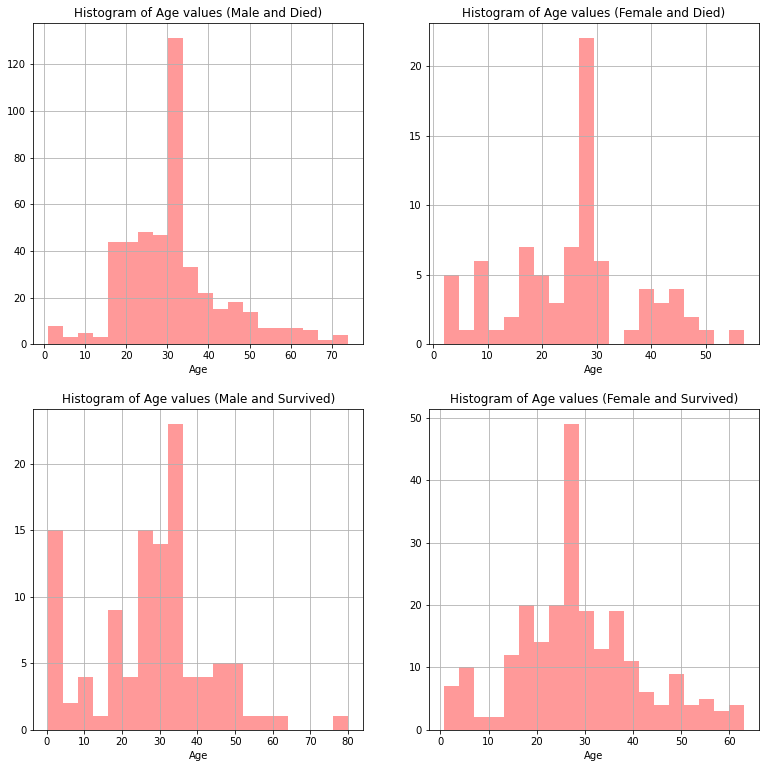

In [117]:
plt.figure(figsize=(6, 6))
sns.distplot(data['Age'], bins=20, kde=False, color='r')
plt.title('Histogram of Age values for all of the data')
plt.grid()
plt.show()

print('----------------------------------------------------------------------')

fig = plt.figure(figsize=(13, 6))

fig.add_subplot(1, 2, 1)
grouped = data.groupby('Survived').get_group(0)
sns.distplot(grouped['Age'], bins=20, kde=False, color='r')
plt.title('Histogram of Age values for Died People(Survived = 0)')
plt.grid()

fig.add_subplot(1, 2, 2)
grouped = data.groupby('Survived').get_group(1)
sns.distplot(grouped['Age'], bins=20, kde=False, color='r')
plt.title('Histogram of Age values for Survived People(Survived = 1)')
plt.grid()
plt.show()

print('----------------------------------------------------------------------')

fig = plt.figure(figsize=(13, 13))

fig.add_subplot(2, 2, 1)
grouped = data.groupby(['Survived', 'Sex']).get_group((0, 0))
sns.distplot(grouped['Age'], bins=20, kde=False, color='r')
plt.title('Histogram of Age values (Male and Died)')
plt.grid()

fig.add_subplot(2, 2, 2)
grouped = data.groupby(['Survived', 'Sex']).get_group((0, 1))
sns.distplot(grouped['Age'], bins=20, kde=False, color='r')
plt.title('Histogram of Age values (Female and Died)')
plt.grid()

fig.add_subplot(2, 2, 3)
grouped = data.groupby(['Survived', 'Sex']).get_group((1, 0))
sns.distplot(grouped['Age'], bins=20, kde=False, color='r')
plt.title('Histogram of Age values (Male and Survived)')
plt.grid()

fig.add_subplot(2, 2, 4)
grouped = data.groupby(['Survived', 'Sex']).get_group((1, 1))
sns.distplot(grouped['Age'], bins=20, kde=False, color='r')
plt.title('Histogram of Age values (Female and Survived)')
plt.grid()
plt.show()

### Heatmap of Correlations

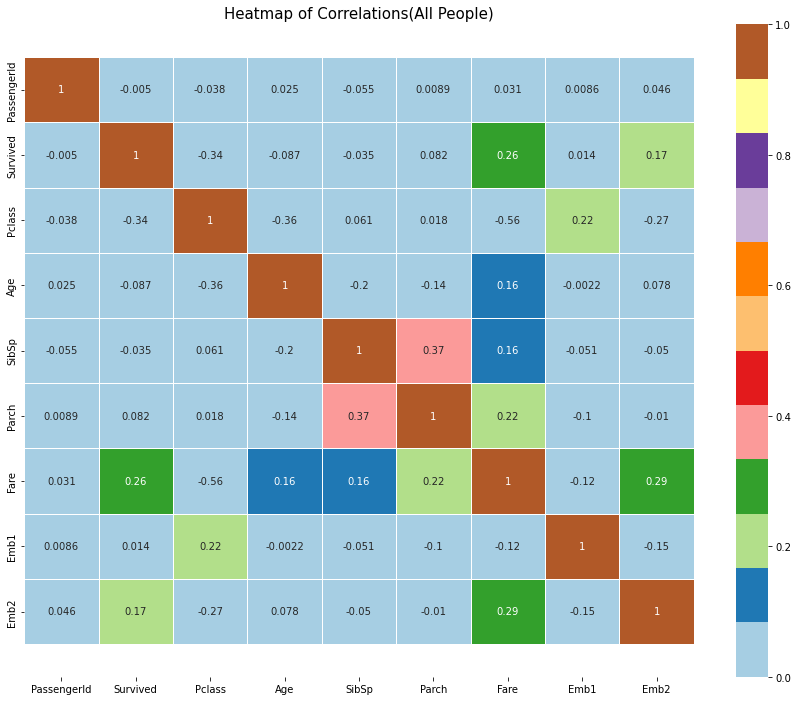

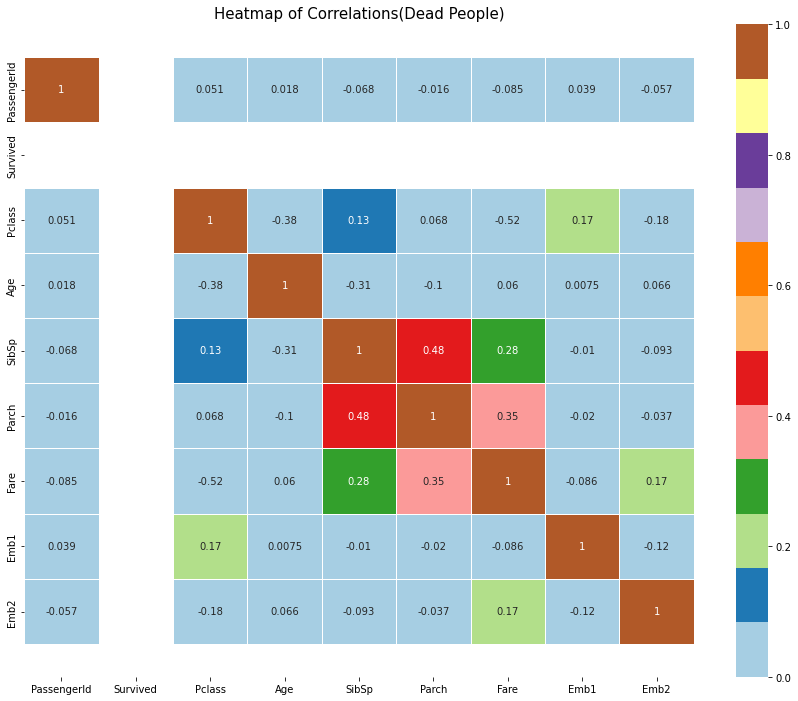

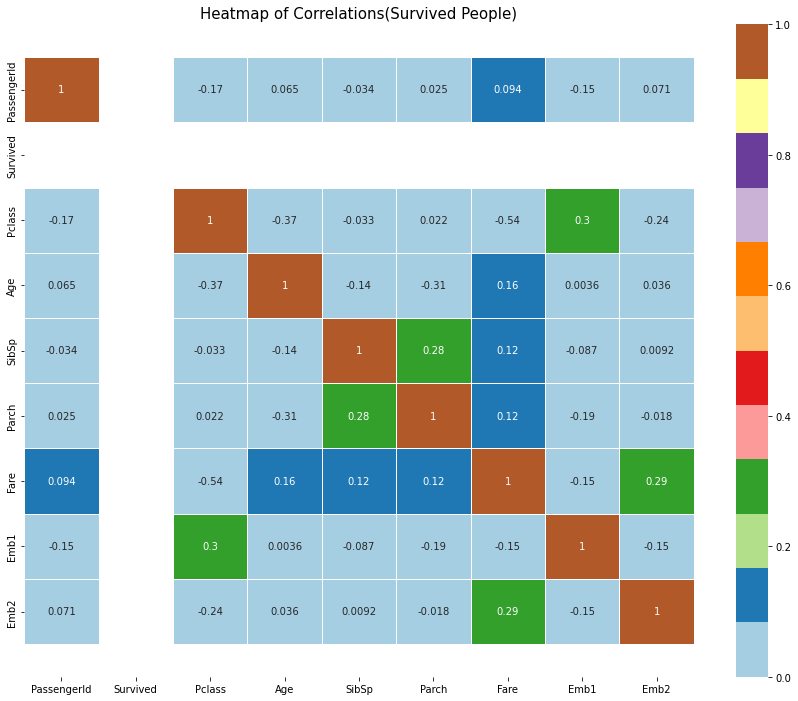

In [118]:
correlation = data.corr()

fig = plt.figure(figsize=(15, 12))
hm = sns.heatmap(correlation,  vmin=0, vmax=1, annot=True, linewidths=.5, cmap='Paired')
bottom, top = hm.get_ylim()
hm.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Heatmap of Correlations(All People)', size=15)
plt.show()


grouped = data.groupby('Survived').get_group(0)
correlation = grouped.corr()

fig = plt.figure(figsize=(15, 12))
hm = sns.heatmap(correlation,  vmin=0, vmax=1, annot=True, linewidths=.5, cmap='Paired')
bottom, top = hm.get_ylim()
hm.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Heatmap of Correlations(Dead People)', size=15)
plt.show()

grouped = data.groupby('Survived').get_group(1)
correlation = grouped.corr()

fig = plt.figure(figsize=(15, 12))
hm = sns.heatmap(correlation,  vmin=0, vmax=1, annot=True, linewidths=.5, cmap='Paired')
bottom, top = hm.get_ylim()
hm.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Heatmap of Correlations(Survived People)', size=15)
plt.show()

## PART3

### Combining Age and Sex Features

In [119]:
# initialize 'Age&Sex' column with zero
data['Age&Sex'] = [0]*len(data)

genders = data.Sex.unique()

for gender in genders:
    # child ---> 0, man ---> 1, woman ---> 2
    grouped = data.groupby('Sex').get_group(gender)
    data.loc[grouped.index, 'Age&Sex'] = (grouped.Age >= 18).astype(int) * (gender+1)

In [120]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title,Emb1,Emb2,Age&Sex
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,NaN,Mr,0,0,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C85,Mrs,0,1,2
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,Mrs,0,0,2
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,C123,Mrs,0,0,2
4,5,0.0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,NaN,Mr,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",0,32.252151,0,0,A.5. 3236,8.0500,NaN,Mr,0,0,1
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",1,39.000000,0,0,PC 17758,108.9000,C105,Others,0,1,2
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",0,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,Mr,0,0,1
1307,1308,NaN,3,"Ware, Mr. Frederick",0,32.252151,0,0,359309,8.0500,NaN,Mr,0,0,1


### Combining Parch and SibSp Features

In [121]:
# defining 'Partner' feature as the sum of Parch and SibSp
data['Partner'] = data['SibSp'] + data['Parch']
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title,Emb1,Emb2,Age&Sex,Partner
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,NaN,Mr,0,0,1,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C85,Mrs,0,1,2,1
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,Mrs,0,0,2,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,C123,Mrs,0,0,2,1
4,5,0.0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,NaN,Mr,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",0,32.252151,0,0,A.5. 3236,8.0500,NaN,Mr,0,0,1,0
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",1,39.000000,0,0,PC 17758,108.9000,C105,Others,0,1,2,0
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",0,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,Mr,0,0,1,0
1307,1308,NaN,3,"Ware, Mr. Frederick",0,32.252151,0,0,359309,8.0500,NaN,Mr,0,0,1,0


### Finding Fare Value for every Single Person

In [122]:
# defining 'Common_Tickets'
tickets = data.Ticket.unique()

for ticket in tickets:
    grouped = data.groupby('Ticket').get_group(ticket)
    data.loc[grouped.index, 'Common_Ticket'] = grouped.shape[0]

# dividing 'Fare' column by 'Common_Ticket' to have 'Single_Fare'
data['Single_Fare'] = data.Fare / data.Common_Ticket

In [123]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title,Emb1,Emb2,Age&Sex,Partner,Common_Ticket,Single_Fare
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,NaN,Mr,0,0,1,1,1.0,7.250000
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C85,Mrs,0,1,2,1,2.0,35.641650
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,Mrs,0,0,2,0,1.0,7.925000
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,C123,Mrs,0,0,2,1,2.0,26.550000
4,5,0.0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,NaN,Mr,0,0,1,0,1.0,8.050000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",0,32.252151,0,0,A.5. 3236,8.0500,NaN,Mr,0,0,1,0,1.0,8.050000
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",1,39.000000,0,0,PC 17758,108.9000,C105,Others,0,1,2,0,3.0,36.300000
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",0,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,Mr,0,0,1,0,1.0,7.250000
1307,1308,NaN,3,"Ware, Mr. Frederick",0,32.252151,0,0,359309,8.0500,NaN,Mr,0,0,1,0,1.0,8.050000


### Defining a New Binary Feature: 'NN_Cabin'

In [124]:
# 'NN_Cabin' is Not NaN Cabin
data['NN_Cabin'] = data.Cabin.isnull().astype(int) * -1 + 1

### Filling Empty Elements of Cabin Column

In [125]:
# Droping numbers in 'Cabin' Column
cb = data[data['Cabin'].notnull()]['Cabin'].str.split("")
for row in cb.index:
    data.iloc[row, 10] = cb[row][1]

# Same Tickets belongs to same Cabins
tickets = data.Ticket.unique()

for ticket in tickets:
    grouped = data.groupby('Ticket').get_group(ticket)
    if grouped.shape[0] != 1:
        data.loc[grouped.index, 'Cabin'] = grouped.Cabin.fillna(method='ffill')
        data.loc[grouped.index, 'Cabin'] = grouped.Cabin.fillna(method='bfill')
        
# filling other nan elements due to the bins of 'Single_Fare' Values
min_fare = min(data.Single_Fare)
max_fare = max(data.Single_Fare)
fare_bins = np.linspace(min_fare-1, max_fare+1, 9)
null_indices = data[data['Cabin'].isna()].index

for row in null_indices:
    if data.loc[row, 'Single_Fare'] > fare_bins[0] and data.loc[row, 'Single_Fare'] <= fare_bins[1]:
        data.loc[row, 'Cabin'] = 'T'
    if data.loc[row, 'Single_Fare'] > fare_bins[1] and data.loc[row, 'Single_Fare'] <= fare_bins[2]:
        data.loc[row, 'Cabin'] = 'G'
    if data.loc[row, 'Single_Fare'] > fare_bins[2] and data.loc[row, 'Single_Fare'] <= fare_bins[3]:
        data.loc[row, 'Cabin'] = 'F'
    if data.loc[row, 'Single_Fare'] > fare_bins[3] and data.loc[row, 'Single_Fare'] <= fare_bins[4]:
        data.loc[row, 'Cabin'] = 'E'
    if data.loc[row, 'Single_Fare'] > fare_bins[4] and data.loc[row, 'Single_Fare'] <= fare_bins[5]:
        data.loc[row, 'Cabin'] = 'D'
    if data.loc[row, 'Single_Fare'] > fare_bins[5] and data.loc[row, 'Single_Fare'] <= fare_bins[6]:
        data.loc[row, 'Cabin'] = 'C'
    if data.loc[row, 'Single_Fare'] > fare_bins[6] and data.loc[row, 'Single_Fare'] <= fare_bins[7]:
        data.loc[row, 'Cabin'] = 'B'
    if data.loc[row, 'Single_Fare'] > fare_bins[7] and data.loc[row, 'Single_Fare'] <= fare_bins[8]:
        data.loc[row, 'Cabin'] = 'A'

for row in range(len(data)):
    if data.loc[row, 'Cabin'] == 'T':
        data.loc[row, 'Cabin_Num'] = 0
    if data.loc[row, 'Cabin'] == 'G':
        data.loc[row, 'Cabin_Num'] = 1
    if data.loc[row, 'Cabin'] == 'F':
        data.loc[row, 'Cabin_Num'] = 2
    if data.loc[row, 'Cabin'] == 'E':
        data.loc[row, 'Cabin_Num'] = 3
    if data.loc[row, 'Cabin'] == 'D':
        data.loc[row, 'Cabin_Num'] = 4 
    if data.loc[row, 'Cabin'] == 'C':
        data.loc[row, 'Cabin_Num'] = 5
    if data.loc[row, 'Cabin'] == 'B':
        data.loc[row, 'Cabin_Num'] = 6
    if data.loc[row, 'Cabin'] == 'A':
        data.loc[row, 'Cabin_Num'] = 7

In [126]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title,Emb1,Emb2,Age&Sex,Partner,Common_Ticket,Single_Fare,NN_Cabin,Cabin_Num
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,T,Mr,0,0,1,1,1.0,7.250000,0,0.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C,Mrs,0,1,2,1,2.0,35.641650,1,5.0
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,T,Mrs,0,0,2,0,1.0,7.925000,0,0.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,C,Mrs,0,0,2,1,2.0,26.550000,1,5.0
4,5,0.0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,T,Mr,0,0,1,0,1.0,8.050000,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",0,32.252151,0,0,A.5. 3236,8.0500,T,Mr,0,0,1,0,1.0,8.050000,0,0.0
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",1,39.000000,0,0,PC 17758,108.9000,C,Others,0,1,2,0,3.0,36.300000,1,5.0
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",0,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,T,Mr,0,0,1,0,1.0,7.250000,0,0.0
1307,1308,NaN,3,"Ware, Mr. Frederick",0,32.252151,0,0,359309,8.0500,T,Mr,0,0,1,0,1.0,8.050000,0,0.0


### Boxplot for Single_Fair values for different Pclasses

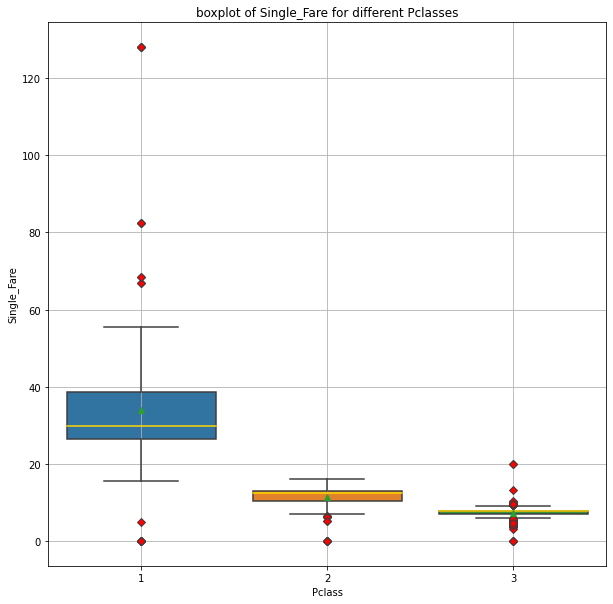

In [127]:
Pclasses = data.Pclass.unique()

plt.figure(figsize=(10, 10))
red_diamond = dict(markerfacecolor='r', marker='D')
sns.boxplot(x='Pclass', y='Single_Fare', data=data, showmeans=True ,medianprops={'color':'gold'}, flierprops=red_diamond)
plt.title("boxplot of Single_Fare for different Pclasses")
plt.grid()
plt.show()

##### As we see, Single_Fare feature is perfectly extracted as there is'nt that much intersection between boxes.

### BarPlot of Cabins

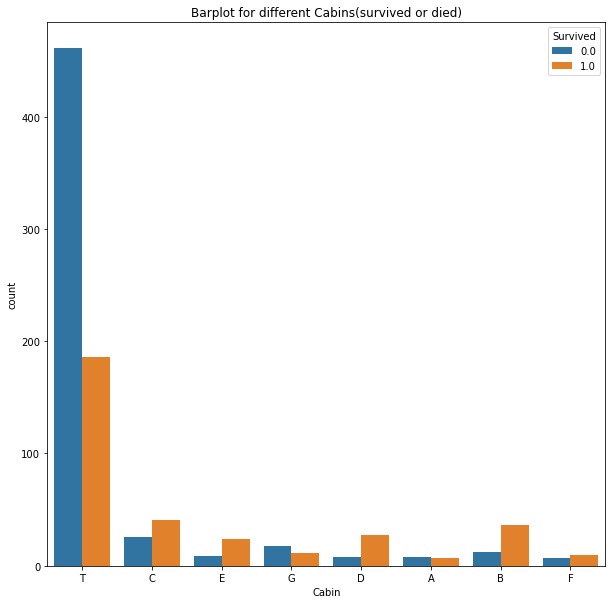

In [128]:
plt.figure(figsize=(10, 10))
sns.countplot(x='Cabin', hue='Survived', data=data)
plt.title('Barplot for different Cabins(survived or died)')
plt.show()

### Heatmap of Correlations

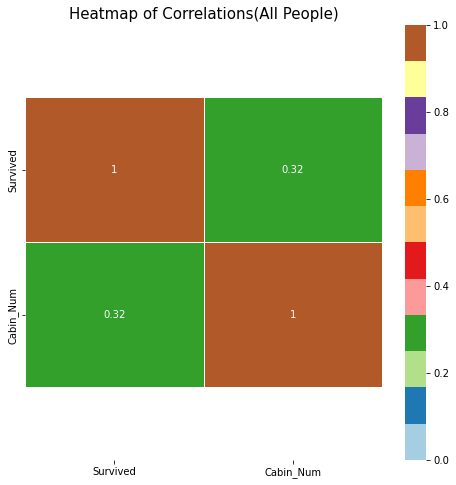

In [129]:
correlation = data.loc[:, ['Survived', 'Cabin_Num']].corr()
fig = plt.figure(figsize=(8, 8))
hm = sns.heatmap(correlation,  vmin=0, vmax=1, annot=True, linewidths=.5, cmap='Paired')
bottom, top = hm.get_ylim()
hm.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Heatmap of Correlations(All People)', size=15)
plt.show()

##### As we see, Correlation between Survived and Cabin_Num features is satisfactory and We have properly filled NaN elements in Cabin column and extracted a reliable feature.

## PART4

##### 'NN_Cabin' as a new feature was extracted in the previous part. Now we evaluate it by using different plots.

### Heatmap of Correlations

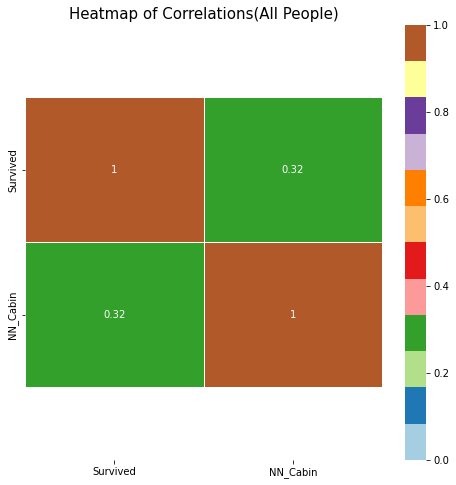

In [130]:
correlation = data.loc[:, ['Survived', 'NN_Cabin']].corr()

fig = plt.figure(figsize=(8, 8))
hm = sns.heatmap(correlation,  vmin=0, vmax=1, annot=True, linewidths=.5, cmap='Paired')
bottom, top = hm.get_ylim()
hm.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Heatmap of Correlations(All People)', size=15)
plt.show()

##### As we see, Correlation between Survived and NN_Cabin features is satisfactory and We have extracted a reliable feature.

### Barplot of NN_Cabin

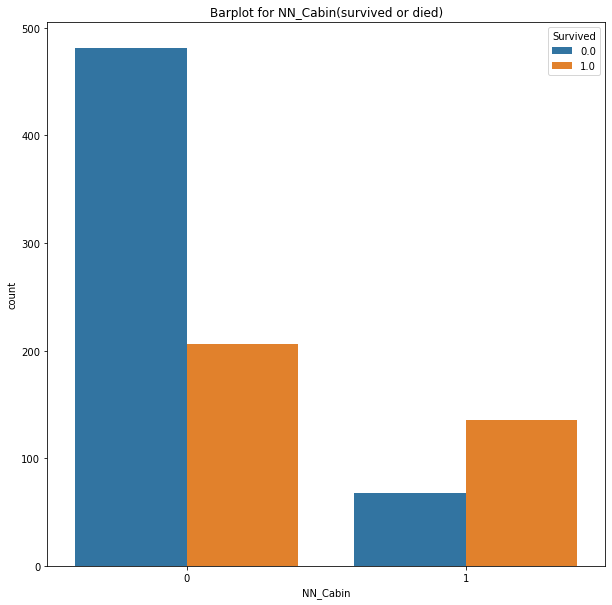

In [131]:
plt.figure(figsize=(10, 10))
sns.countplot(x='NN_Cabin', hue='Survived', data=data)
plt.title('Barplot for NN_Cabin(survived or died)')
plt.show()

### Defining a New Binary Feature: 'Being_MOD'

In [132]:
# Being Mother or Daughter ---> Being_MOD
data['Being_MOD'] = (data.Sex * (data.Parch > 0).astype(int)).astype(float)

### Barplot for Being_MOD

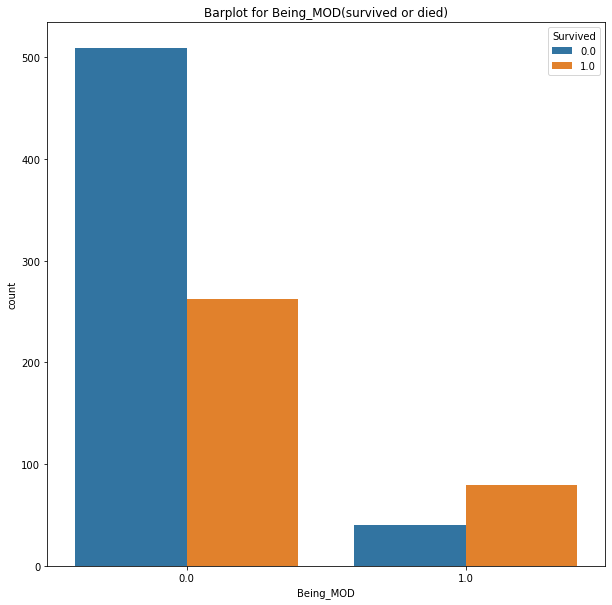

In [133]:
plt.figure(figsize=(10, 10))
sns.countplot(x='Being_MOD', hue='Survived', data=data)
plt.title('Barplot for Being_MOD(survived or died)')
plt.show()

### Heatmap of Correlations

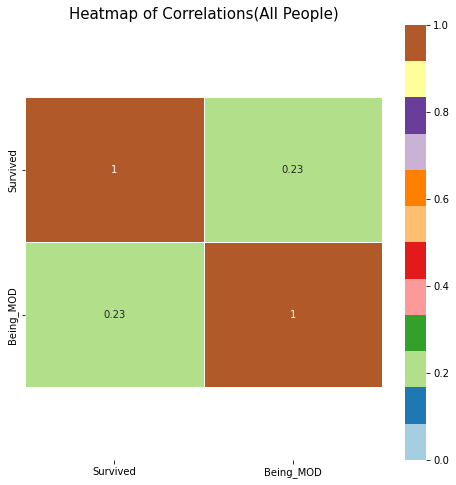

In [134]:
correlation = data.loc[:, ['Survived', 'Being_MOD']].corr()
fig = plt.figure(figsize=(8, 8))
hm = sns.heatmap(correlation,  vmin=0, vmax=1, annot=True, linewidths=.5, cmap='Paired')
bottom, top = hm.get_ylim()
hm.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Heatmap of Correlations(All People)', size=15)
plt.show()

##### So we successfully extracted three new feature: 'Cabin_Num', 'NN_Cabin' and 'Being_Mother' which have a sufficient correlation with 'Survived' feature and can be used to predict our model.

### Heatmap of All Data Together

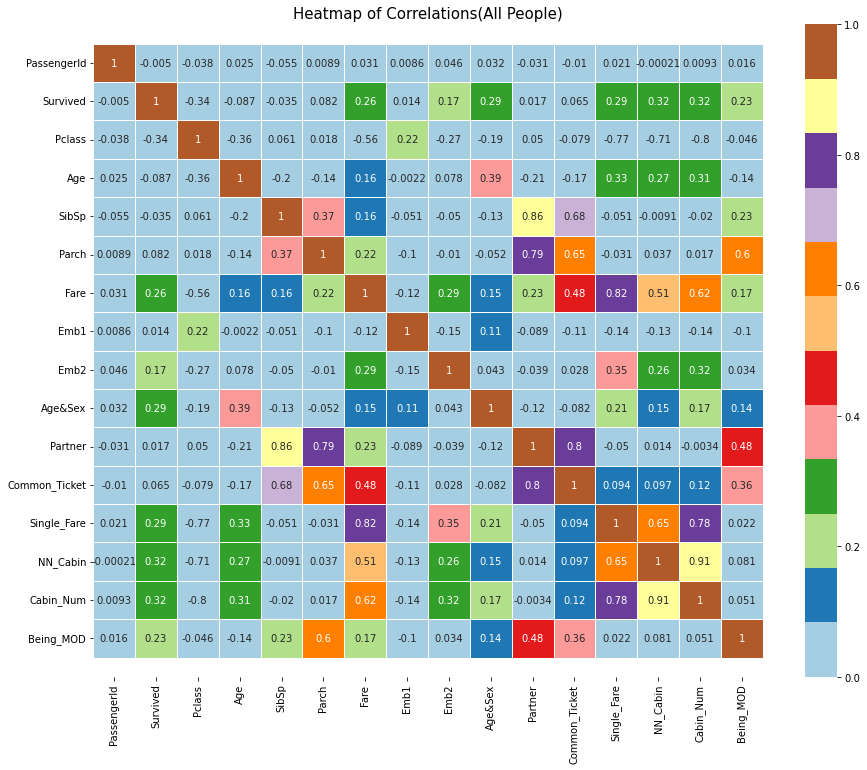

In [135]:
correlation = data.corr()

fig = plt.figure(figsize=(15, 12))
hm = sns.heatmap(correlation,  vmin=0, vmax=1, annot=True, linewidths=.5, cmap='Paired')
bottom, top = hm.get_ylim()
hm.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Heatmap of Correlations(All People)', size=15)
plt.show()

In [136]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Emb1,Emb2,Age&Sex,Partner,Common_Ticket,Single_Fare,NN_Cabin,Cabin_Num,Being_MOD
count,1309.000000,891.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,0.383838,2.294882,30.044098,0.498854,0.385027,33.280206,0.095493,0.207792,1.183346,0.883881,2.101604,14.756516,0.225363,1.146677,0.132162
std,378.020061,0.486592,0.837836,12.947325,1.041658,0.865560,51.741830,0.294007,0.405882,0.620740,1.583639,1.779832,13.550515,0.417981,2.079799,0.338796
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000,1.000000,0.000000,1.000000,7.550000,0.000000,0.000000,0.000000
50%,655.000000,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000,0.000000,1.000000,8.050000,0.000000,0.000000,0.000000
75%,982.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.275000,0.000000,0.000000,2.000000,1.000000,3.000000,15.000000,0.000000,1.000000,0.000000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000,1.000000,2.000000,10.000000,11.000000,128.082300,1.000000,7.000000,1.000000


### Saving Data

In [137]:
data.loc[:891, :].to_csv('new_train.csv')
data.loc[891:, :].to_csv('new_test.csv')

After this, please run the Prediction file.